In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

###### Heart disease data from UCI ml website
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [256]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
             'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                header=None, names = col_names)

In [257]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [259]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [260]:
df.shape

(303, 14)

In [261]:
df.num.unique()

array([0, 2, 1, 3, 4])

#### convert non-'0' values for 'num' to '1'

In [262]:
df['num'] = np.where(df.num==0, 0, 1)

In [263]:
df.num

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [264]:
df.num.unique()

array([0, 1])

### Check unique values for every attribute

In [265]:
uniques = {col: df[col].unique() for col in  np.array(df.columns)}
uniques

{'age': array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
        64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
        71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
        74., 76.]),
 'sex': array([1., 0.]),
 'cp': array([1., 4., 3., 2.]),
 'trestbps': array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
        112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
        108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
        101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
        146., 106., 156., 154., 114., 164.]),
 'chol': array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
        294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
        224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
        276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
        290., 253., 172., 273., 213., 3

### and correct those with data quality issues

In [266]:
df.replace('?', np.nan, inplace=True)

In [267]:
df['ca'] = df.ca.astype(np.float)
df['thal'] = df.thal.astype(np.float)
uniques = {col: df[col].unique() for col in  np.array(df.columns)}

In [268]:
uniques

{'age': array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
        64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
        71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
        74., 76.]),
 'sex': array([1., 0.]),
 'cp': array([1., 4., 3., 2.]),
 'trestbps': array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
        112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
        108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
        101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
        146., 106., 156., 154., 114., 164.]),
 'chol': array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
        294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
        224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
        276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
        290., 253., 172., 273., 213., 3

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [270]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

### Plot the numbers before modelling!

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x1a40b9f7d0>>

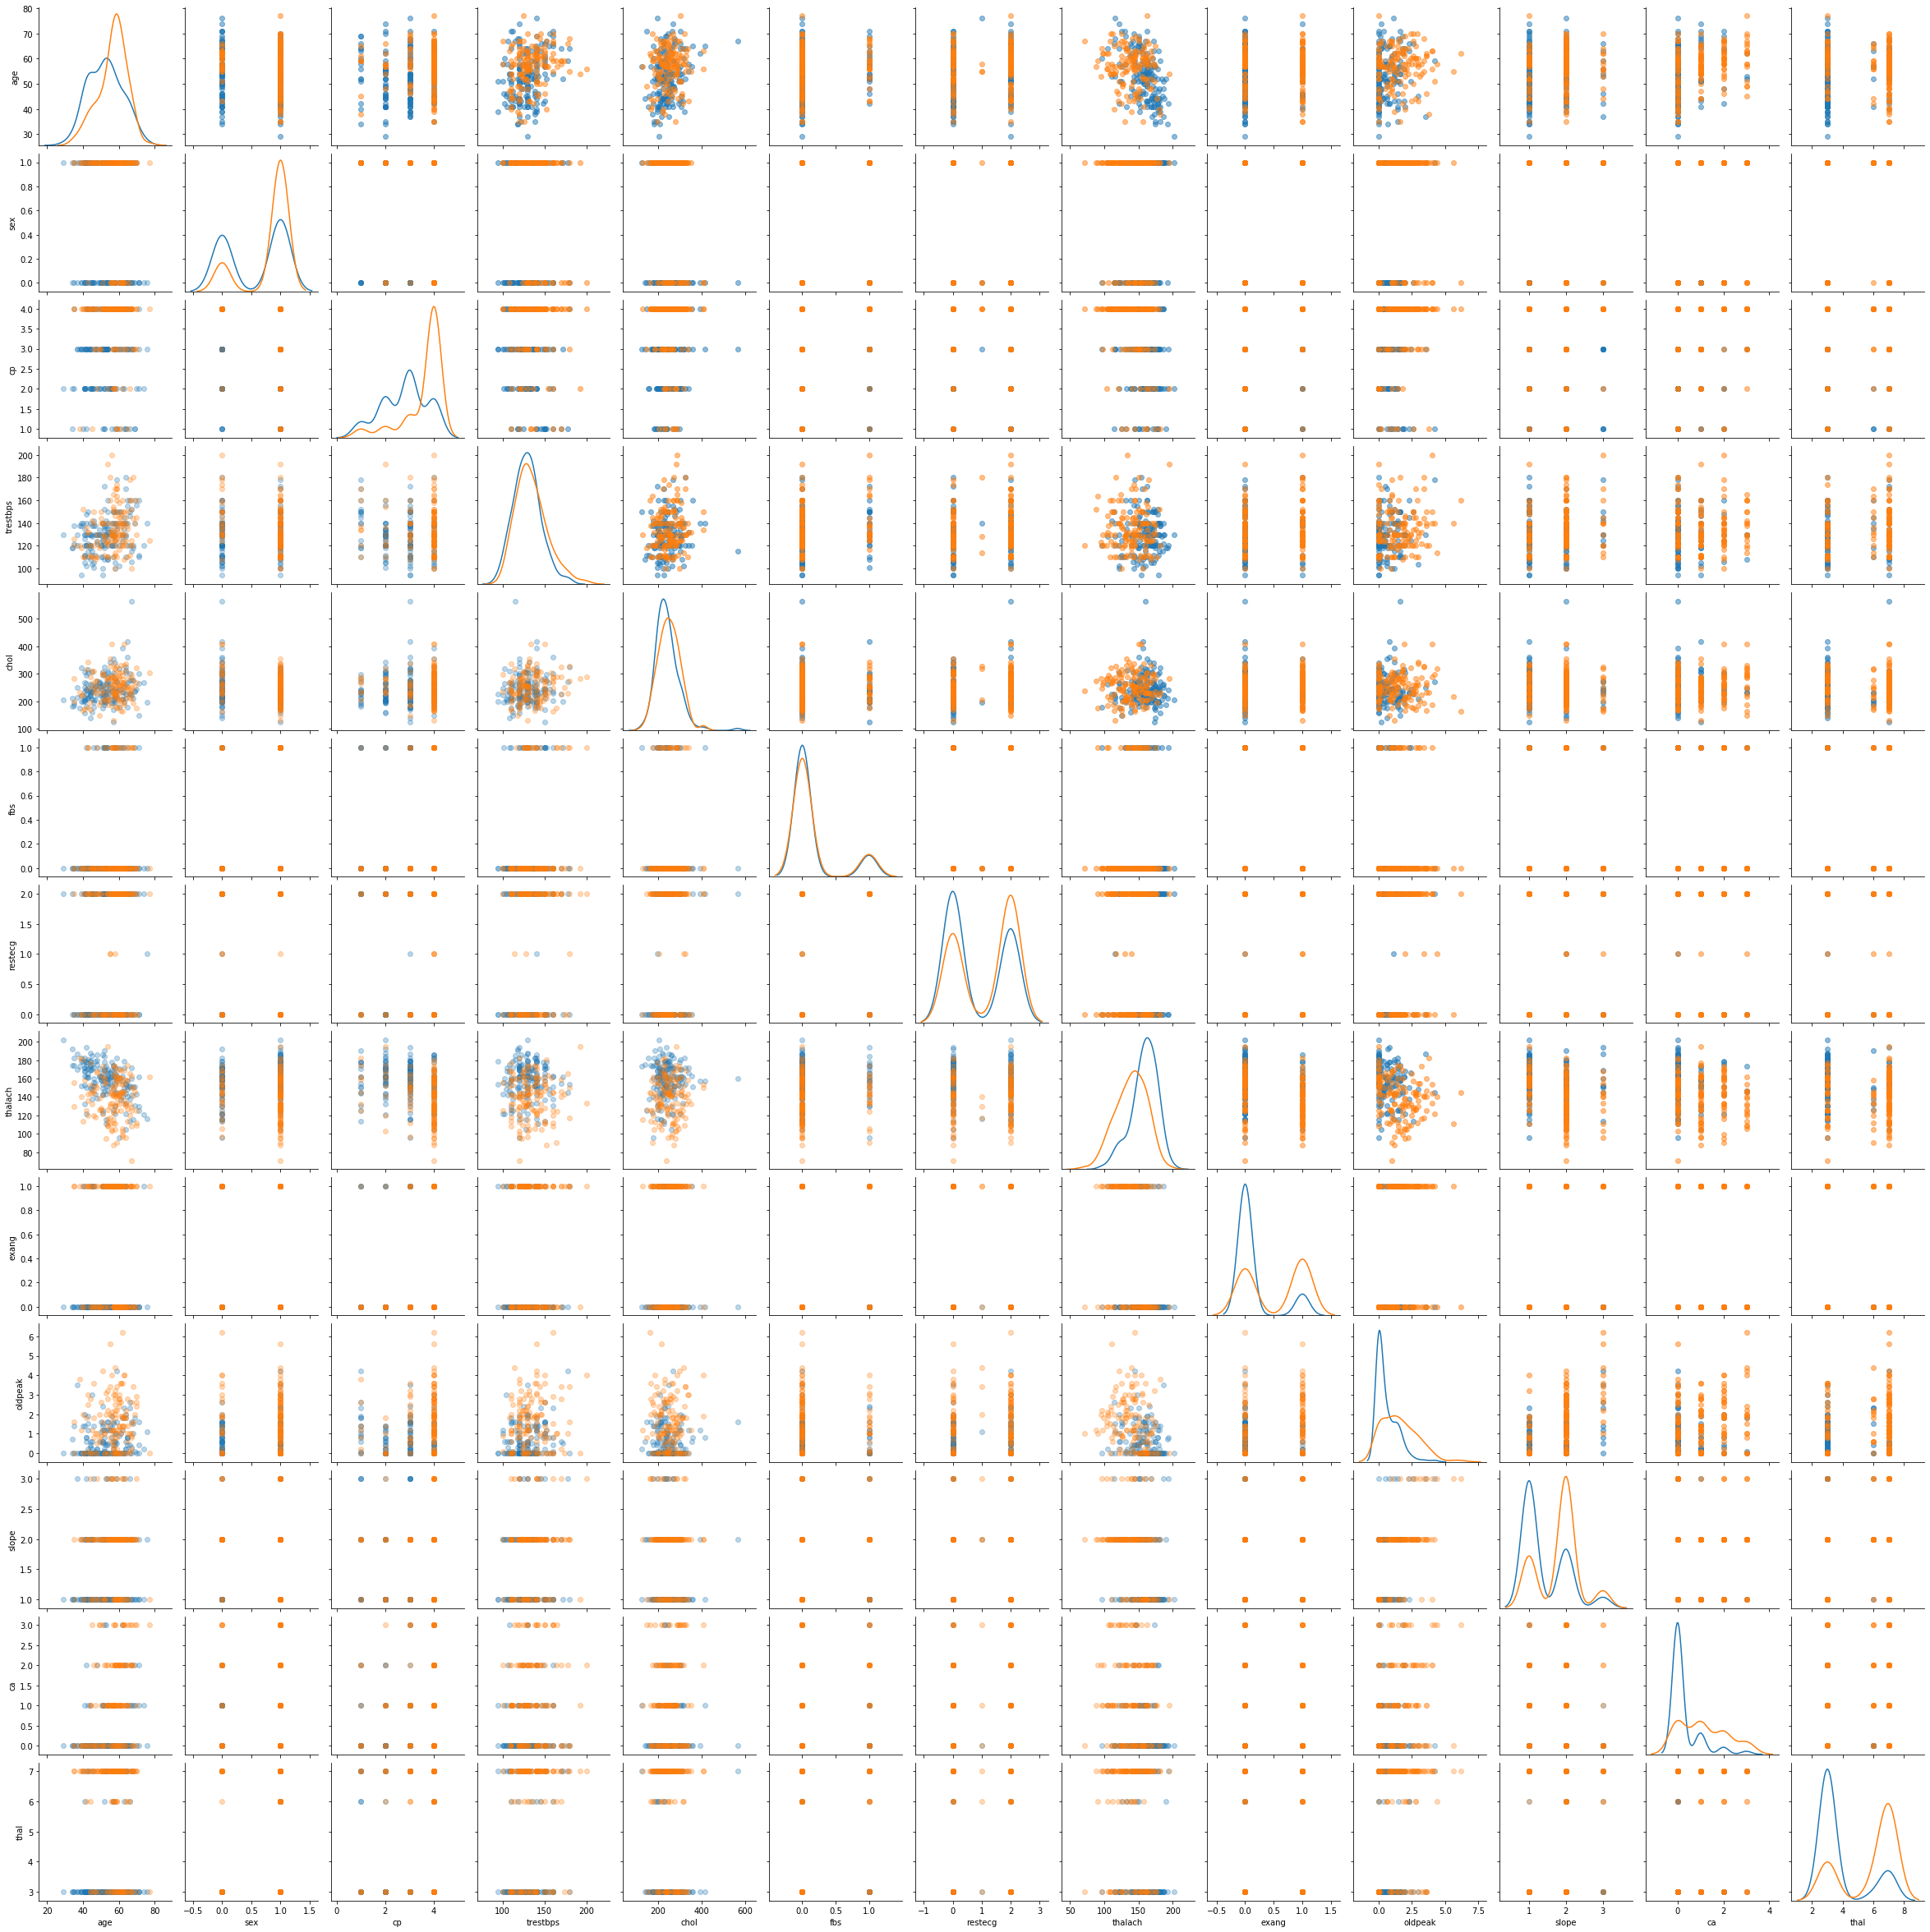

In [103]:
g = sns.PairGrid(data=df, diag_sharey=False, hue='num')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.3})
g.add_legend


In [99]:
type(g)

seaborn.axisgrid.PairGrid

### Remove NaN

In [249]:
from sklearn.impute import SimpleImputer

In [250]:
imputer = SimpleImputer(strategy='most_frequent', verbose=1)

In [251]:
imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=1)

In [252]:
df = imputer.transform(df)


In [254]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [240]:
### Split dataset into training and test part

In [241]:
X = df.drop('num', axis=1)
y = df.num

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=20)

### One Hot Encoding

In [187]:
from sklearn.preprocessing import OneHotEncoder

In [188]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [189]:
#select columns of categorical variables for transformation into numeric dummies
mask = df.columns.isin(['cp','restecg','slope','thal'])[:-1]

In [190]:
mask

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True])

In [196]:
df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

In [198]:
X_train.shape

(242, 13)

In [206]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [214]:
enc.fit(X_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [215]:
X_train2 = enc.transform(X_train)
X_test2 = enc.transform(X_test)

In [216]:
X_train.shape

(242, 13)

In [217]:
X_train2.shape

(242, 365)

In [219]:
X_train[0]

array([ 45. ,   0. ,   4. , 138. , 236. ,   0. ,   2. , 152. ,   1. ,
         0.2,   2. ,   0. ,   3. ])